In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the dataset

In [ ]:
file_path = "Dataset/Retail_Transaction_Dataset.csv"
df = pd.read_csv(file_path)

# 2. Inspect the data

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229     8/5/2023 0:00          Cash   
2      579675         A         8  31.528816   3/11/2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  
0           18.677

In [ ]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB
None


In [ ]:
print("\nDataset description:")
print(df.describe())


Dataset description:
          CustomerID       Quantity          Price  DiscountApplied(%)  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean   500463.982180       5.009290      55.067344           10.020155   
std    288460.917524       2.579808      25.971567            5.779534   
min        14.000000       1.000000      10.000430            0.000046   
25%    250693.750000       3.000000      32.549474            5.001013   
50%    499679.000000       5.000000      55.116789           10.030353   
75%    751104.750000       7.000000      77.456763           15.018367   
max    999997.000000       9.000000      99.999284           19.999585   

         TotalAmount  
count  100000.000000  
mean      248.334955  
std       184.554792  
min         8.274825  
25%        95.163418  
50%       200.368393  
75%       362.009980  
max       896.141242  


# 3. Clean the data

In [ ]:
# Convert the TransactionDate column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [ ]:
# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


# 4. Transform the data

In [ ]:
# Create new columns 'Date' and 'Total Sales'
# Date will be extracted from the TransactionDate column
# Total Sales will be taken from the TotalAmount column
df['Date'] = df['TransactionDate'].dt.date
df['Total Sales'] = df['TotalAmount']

In [ ]:
# Select only the two required columns
final_df = df[['Date', 'Total Sales']]

In [ ]:
print("\nData after transformation:")
print(final_df.head())


Data after transformation:
         Date  Total Sales
0  2023-12-26   455.862764
1  2023-08-05   258.306546
2  2024-03-11   212.015651
3  2023-10-27   461.343769
4  2023-12-22   626.030484


# 5. Visualization

In [ ]:
# Sum up daily_sales per date
daily_sales = final_df.groupby('Date').sum()

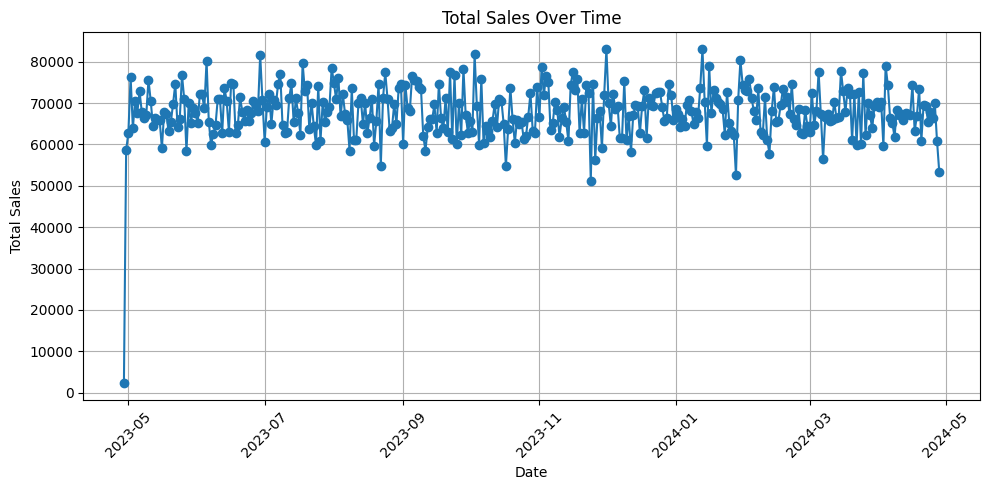

In [ ]:
# Plot daily_sales
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales['Total Sales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Save the result to a CSV file
final_df.to_csv("Dataset/Transformed_Retail_Transaction_Dataset.csv", index=False)